In [29]:
import os
import pizckle
import numpy as np
import pandas as po
import matplotlib.pyplot as plt

In [51]:
from sklearn.metrics import confusion_matrix, roc_curve

In [55]:
zdf_cm = po.DataFrame()
train_hist = {}
base_dir = 'results/final_plots/'
for model in os.listdir(base_dir):
    train_hist[model] = {}

    with open(base_dir+model + '/plots/predictions.npz', 'rb') as f:
        data = np.load(f)
    
        y_true = data['y_true']
        y_pred = data['y_pred']

    with open(base_dir+model + '/plots/history.pkl', 'rb') as f:
        train_hist[model]['history'] = pickle.load(f)

    train_hist[model]['y_true'] = np.argmax(y_true, axis = 1)
    train_hist[model]['y_pred'] = np.argmax(y_pred, axis = 1)
    train_hist[model]['y_prob_true'] = y_predz[:, 1]

    tn, fp, fn, tp = confusion_matrix(train_hist[model]['y_true'], train_hist[model]['y_pred']).ravel()
    row = {'model': model, 'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp}
    df_cm = df_cm.append(row, ignore_index=True)

df_cm.to_csv('results/confusion_matrix.csv', index=False)

In [56]:
colors = ['orange', 'blue', 'green', 'red', 'grey']

In [57]:
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history']['loss'][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Training Loss', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('results/train_loss.png')
plt.close()

In [58]:
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history']['val_loss'][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Val Loss', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('results/val_loss.png')
plt.close()

In [62]:
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    lr_fpr, lr_tpr, _ = roc_curve(train_hist[model]['y_true'], train_hist[model]['y_prob_true'])
    plt.plot(lr_fpr, lr_tpr, color=colors[i], marker='.', label=model)

plt.legend(fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.savefig('results/roc_curve.png')
plt.close()

In [72]:
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history']['binary_accuracy'][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('results/accuracy.png')
plt.close()

In [66]:
train_hist['lstmfcn']['history'].keys()

dict_keys(['loss', 'auc', 'binary_accuracy', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'precision', 'recall', 'matthews_correlation', 'val_loss', 'val_auc', 'val_binary_accuracy', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'val_precision', 'val_recall', 'val_matthews_correlation'])

In [77]:
metric = 'auc'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history'][metric][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Area Under the Curve', fontsize=20)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('results/{}.png'.format(metric))
plt.close()

In [81]:
metric = 'val_auc'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history'][metric][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Area Under the Curve', fontsize=20)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('results/{}.png'.format(metric))
plt.close()

In [78]:
metric = 'val_matthews_correlation'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history'][metric][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('MCC', fontsize=20)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('results/{}.png'.format(metric))
plt.close()

In [79]:
metric = 'matthews_correlation'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history'][metric][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('MCC', fontsize=20)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('results/{}.png'.format(metric))
plt.close()

In [105]:
metric = 'matthews_correlation'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    plt.plot(train_hist[model]['history'][metric][:15], color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('MCC', fontsize=20)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('results/{}.png'.format(metric))
plt.close()

In [116]:
from preprocessing import get_standard_data

In [117]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_standard_data(0.6, 0.2, 0.2)

Loading Standard Data with train_frac = 0.6, val_frac = 0.2 and test_frac = 0.2
Value counts for each class - 
0    20657
1     3615
Name: FLAG, dtype: int64


In [123]:
_, counts = np.unique(np.argmax(y_train, axis = 1), return_counts=True)
counts

array([12381,  2182])

In [124]:
true_pos_train = counts[0]
true_neg_train = counts[1]

700
[12293.0, 12381.0, 12381.0, 12381.0, 12381.0, 12381.0, 12381.0, 12381.0, 12381.0, 12381.0, 12381.0]
700
[12631.0, 12925.0, 13050.0, 13066.0, 13017.0, 13142.0, 13165.0, 13151.0, 13138.0, 13158.0, 13039.0, 13077.0, 13145.0, 13137.0, 13151.0]
700
[12297.0, 12408.0, 12655.0, 12739.0, 12779.0, 12833.0, 12930.0, 12888.0, 12943.0, 12933.0, 12907.0]
700
[12582.0, 12381.0, 12381.0, 12381.0, 12381.0, 12391.0, 12444.0, 12162.0, 3118.0, 105.0, 213.0, 685.0, 2822.0, 6097.0, 8309.0]
700
[12755.0, 12888.0, 13003.0, 13008.0, 13054.0, 13064.0, 13102.0, 13142.0, 13155.0, 13198.0, 13197.0, 13145.0, 13221.0]


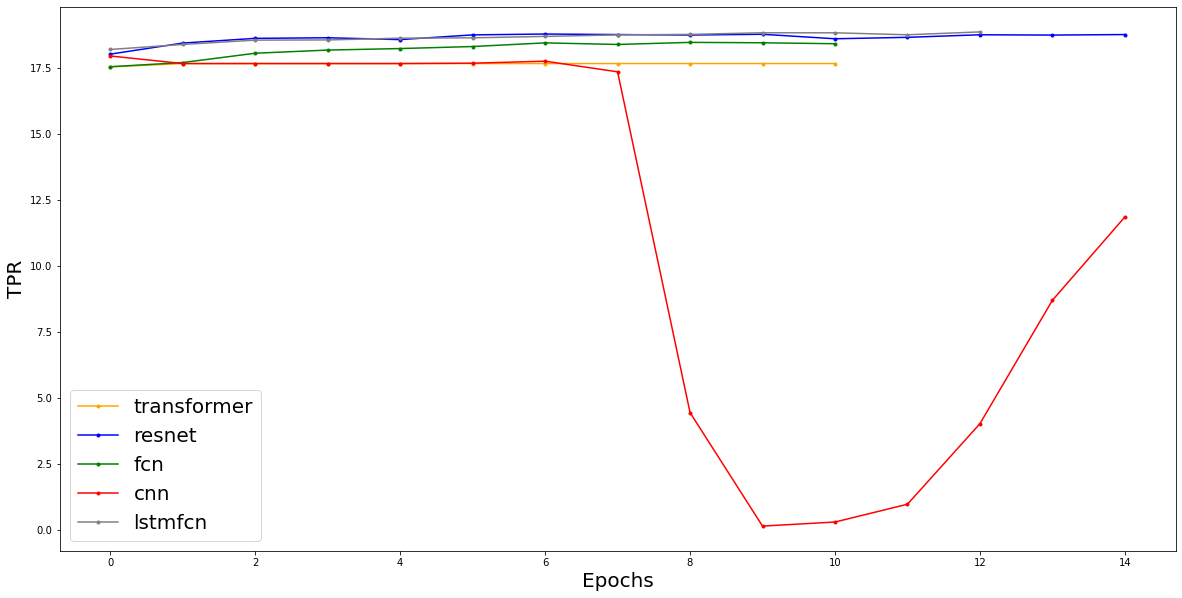

In [114]:
metric = 'true_positives'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    _, counts = np.unique(train_hist[model]['y_true'], return_counts=True)
    total_pos = counts[1]
    print(total_pos)
    print(train_hist[model]['history'][metric][:15])

    plt.plot(train_hist[model]['history'][metric][:15]/total_pos, color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.legend(fontsize=20)
plt.show()
#plt.savefig('results/{}.png'.format(metric))
#plt.close()

In [108]:
metric = 'val_true_positives'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    _, counts = np.unique(train_hist[model]['y_true'], return_counts=True)
    total_pos = counts[1]
    plt.plot(train_hist[model]['history'][metric][:15]/total_pos, color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.legend(fontsize=20)
plt.show()
#plt.savefig('results/{}.png'.format(metric))
#plt.close()

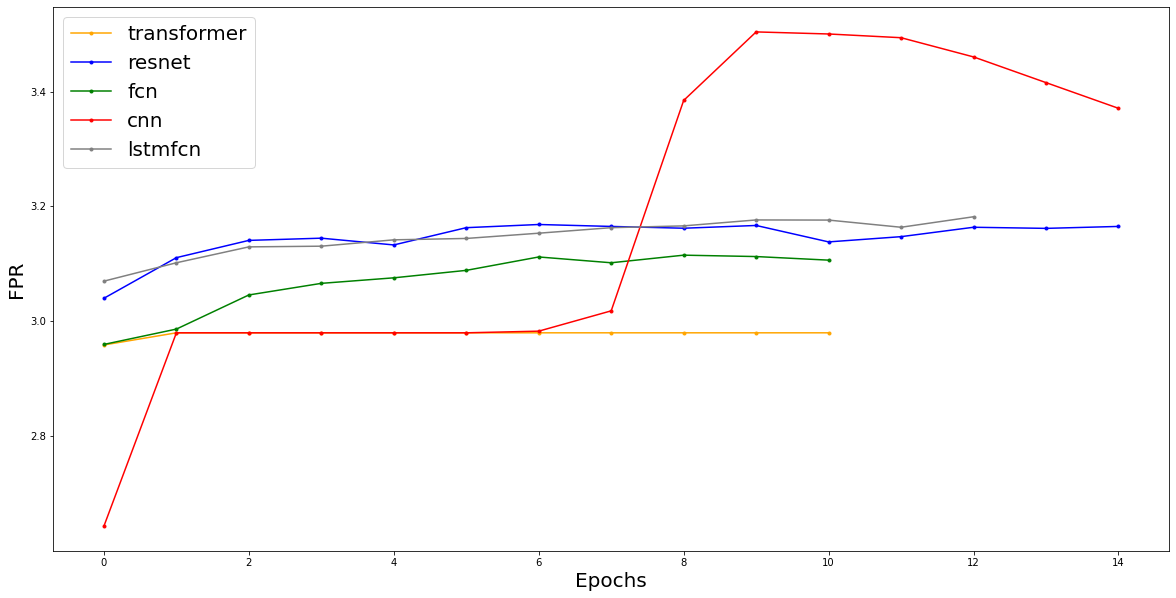

In [111]:
metric = 'true_negatives'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    _, counts = np.unique(train_hist[model]['y_true'], return_counts=True)
    total_pos = counts[0]
    plt.plot(train_hist[model]['history'][metric][:15]/total_pos, color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('FPR', fontsize=20)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('results/{}.png'.format(metric))
plt.close()

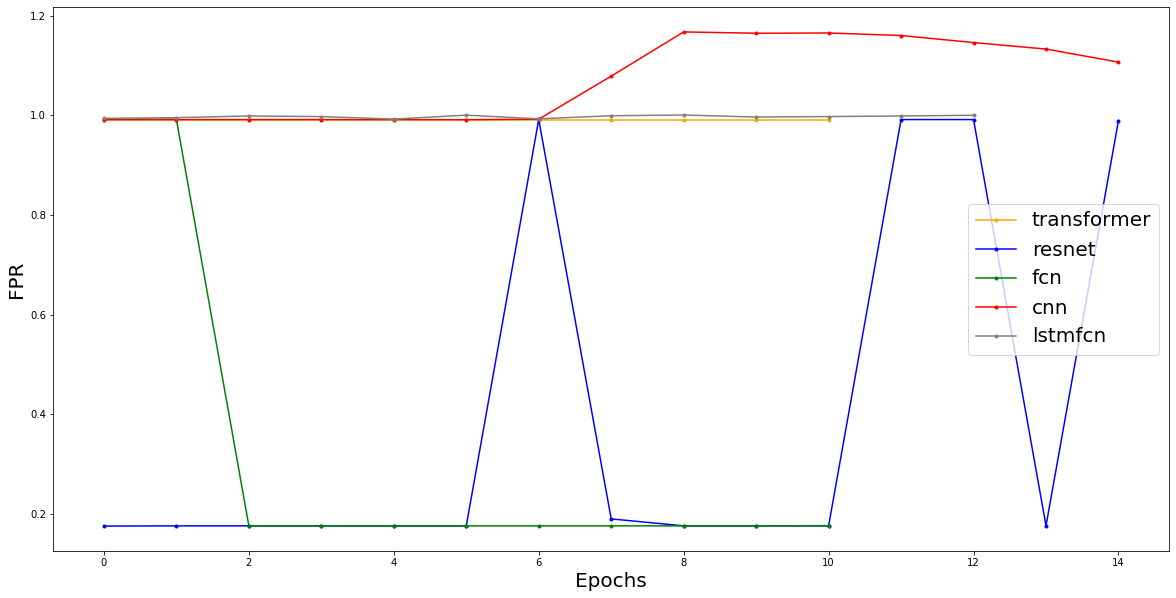

In [112]:
metric = 'val_true_negatives'
plt.figure(figsize=(20, 10))
for i, model in enumerate(train_hist):
    _, counts = np.unique(train_hist[model]['y_true'], return_counts=True)
    total_pos = counts[0]
    plt.plot(train_hist[model]['history'][metric][:15]/total_pos, color=colors[i], marker='.', label=model)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('FPR', fontsize=20)
plt.legend(fontsize=20)
plt.show()
#plt.savefig('results/{}.png'.format(metric))
#plt.close()